#Dans cet exercice, nous utiliserons les données de l'Iris pour effectuer une segmentation non supervisée à l'aide du modèle K-means. Ensuite, nous comparerons les résultats de ce modèle avec les étiquettes réelles pour évaluer sa performance


In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans


Chargement des données de l'Iris

In [182]:
iris=load_iris()
X=iris.data
y=iris.target


Tracage initial du nuage de points de l'Iris

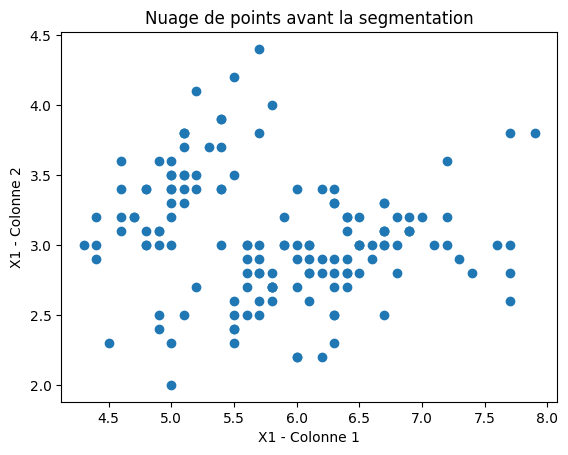

In [183]:
# Tracage du nuage de points initial
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('X1 - Colonne 1')
plt.ylabel('X1 - Colonne 2')
plt.title('Nuage de points avant la segmentation')
plt.show()

Affichage de la courbe du coude

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

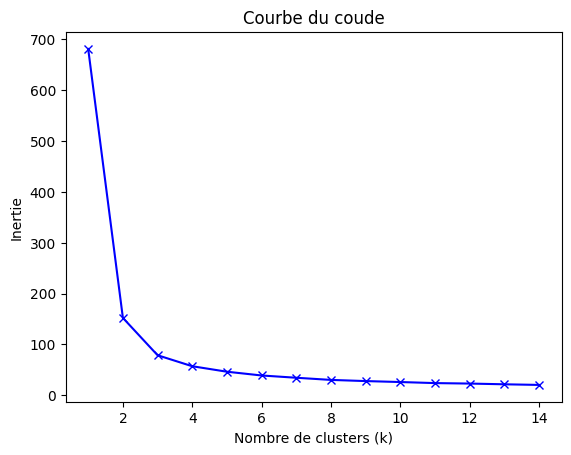

In [184]:
# Liste pour stocker les valeurs d'inertie
inertie = []

# Nombre de clusters à tester
k_values = range(1, 15)

# Calcul de l'inertie pour chaque valeur de k
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertie.append(kmeans.inertia_)

# Tracé de la courbe du coude
plt.plot(k_values, inertie, 'bx-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title('Courbe du coude')
plt.show()

Affichage de la courbe avec les valeurs d'inertie

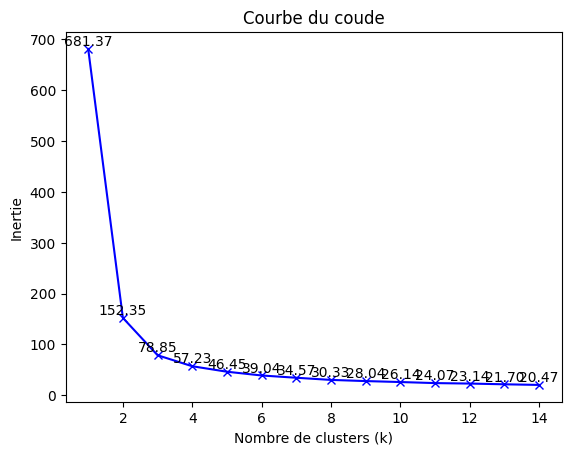

In [185]:
plt.plot(k_values, inertie, 'bx-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title('Courbe du coude')

# Ajout des annotations textuelles des valeurs d'inertie
for i, inertie_value in enumerate(inertie):
    plt.text(k_values[i], inertie_value, f'{inertie_value:.2f}', ha='center', va='bottom')

plt.show()

Affichage du nuage de points après la segmentation avec k=3




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


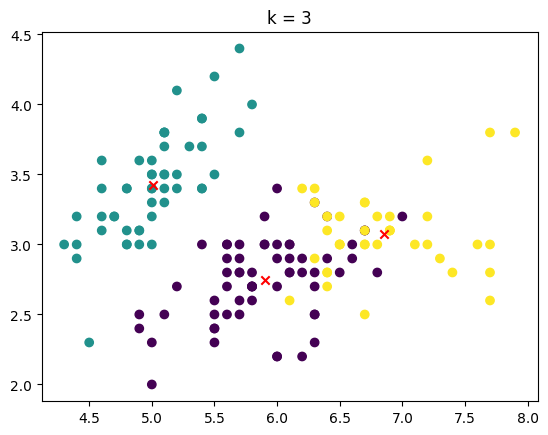

In [186]:
# Nombre de clusters à tester
k = 3

# Création d'un objet KMeans avec k clusters
kmeans = KMeans(n_clusters=k)
# Entraînement du modèle
kmeans.fit(X)
# Obtention des affectations de cluster pour chaque échantillon
labels = kmeans.labels_
# Obtention des centres de cluster
centers = kmeans.cluster_centers_

# Tracé du nuage de points avec les résultats du regroupement
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x')
plt.title(f'k = {k}')
plt.show()

Affichage du nuage de points avec les étiquettes réelles Y

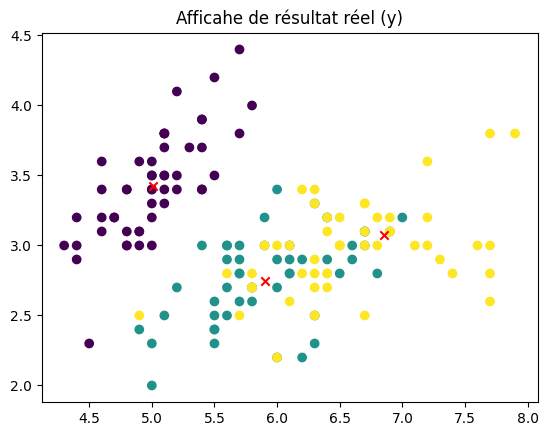

In [187]:
# Tracé du nuage de points avec les résultats du regroupement
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x')
plt.title(f'Afficahe de résultat réel (y)')
plt.show()

In [188]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [189]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

Pour obtenir deux figures avec les mêmes couleurs, vous pouvez permuter les valeurs 0 et 1 dans les labels ou dans y. Pour cela, vous pouvez utiliser la fonction np.where. Par exemple, pour permuter les valeurs dans les labels :

#labels_permuted = np.where(labels == 0, 1, np.where(labels == 1, 0, labels))

Cette solution est temporaire et vous permet de mieux comparer les deux affichages

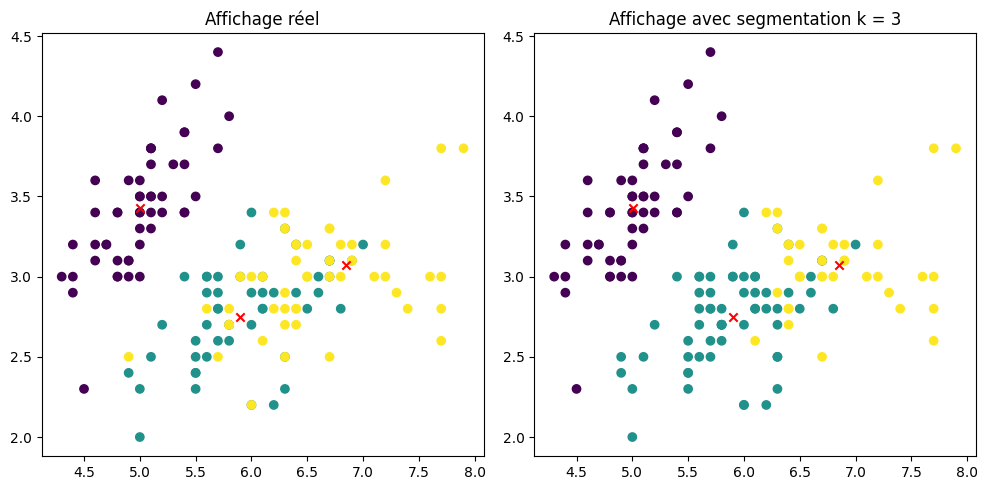

In [190]:
import matplotlib.pyplot as plt

# Créer une figure avec deux sous-graphiques disposés en 1 ligne et 2 colonnes
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
#t=np.array(['blue','green','yellow'])
labels_permuted = np.where(labels == 0, 1, np.where(labels == 1, 0, labels))
# Premier sous-graphique : Résultat du premier regroupement
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
axes[0].scatter(centers[:, 0], centers[:, 1], c='red', marker='x')
axes[0].set_title('Affichage réel')

# Deuxième sous-graphique : Résultat du deuxième regroupement
axes[1].scatter(X[:, 0], X[:, 1], c=labels_permuted, cmap='viridis')
axes[1].scatter(centers[:, 0], centers[:, 1], c='red', marker='x')
axes[1].set_title(f'Affichage avec segmentation k = {k}')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()


Calcul et affichage de la matrice de confusion pour comparer les erreurs de chaque segmentation de classification

In [191]:
from sklearn.metrics import confusion_matrix

# Calcul de la matrice de confusion entre labels et y
confusion_mat = confusion_matrix(y, labels)

# Affichage de la matrice de confusion
print(confusion_mat)

[[ 0 50  0]
 [48  0  2]
 [14  0 36]]
